In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# Now let's read the dataset:

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90000,0,yes,southwest,16884.92400
1,18,male,33.77000,1,no,southeast,1725.55230
2,28,male,33.00000,3,no,southeast,4449.46200
3,33,male,22.70500,0,no,northwest,21984.47061
4,32,male,28.88000,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
#check dataset

In [6]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe().T)
check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
--------------------     Data Shape     --------------------
(1338, 7)

--------------------  The First 5 Data  --------------------
   age     sex      bmi  children smoker     region     charges
0   19  female 27.90000         0    yes  southwest 16884.92400
1   18    male 33.77000         1     no  southeast  1725.55230
2   28    male 33.00000         3     no  southeast  4449.46200
3   33    male 22.70500  

In [7]:
duplicated = len(df[df.duplicated()])
print(f'There ara {duplicated} duplicated rows')
df = df.drop_duplicates()
print(f'dropped')

There ara 1 duplicated rows
dropped


In [8]:
#Categorical variable and Numerical variable

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [10]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1337
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [11]:
print("Categorical Variable:", cat_cols)

Categorical Variable: ['sex', 'smoker', 'region', 'children']


In [12]:
print( "Numerical Variable:", num_cols)

Numerical Variable: ['age', 'bmi', 'charges']


In [13]:
#Outliers???

In [14]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

for col in num_cols:
    low_limit, up_limit = outlier_thresholds(df, col)
    print(low_limit, up_limit)

-51.0 133.0
-24.88130000000006 89.18670000000009
-69674.30171700002 119465.05603500003


In [15]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df,col))

age False
bmi False
charges False


In [16]:
df.value_counts("children")

children
0    573
1    324
2    240
3    157
4     25
5     18
dtype: int64

In [17]:
df["children"].nunique()

6

In [18]:
#object labels to categorical
df['children'] = df['children'].astype('category')
df.dtypes

age            int64
sex           object
bmi          float64
children    category
smoker        object
region        object
charges      float64
dtype: object

In [19]:
df.describe().T
df.loc[(df["age"] >= 18) & (df["age"] <= 30), 'age_category'] = 'young adult'
df.loc[(df["age"] >= 30) & (df["age"] <= 50), 'age_category'] = "adult"
df.loc[(df["age"] >= 50), 'age_category'] = "old"
df.head()

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.90000,0,yes,southwest,16884.92400,young adult
1,18,male,33.77000,1,no,southeast,1725.55230,young adult
2,28,male,33.00000,3,no,southeast,4449.46200,young adult
3,33,male,22.70500,0,no,northwest,21984.47061,adult
4,32,male,28.88000,0,no,northwest,3866.85520,adult


In [23]:
df.loc[(df["bmi"] < 18), 'BMI category'] = 'underweight'
df.loc[(df["bmi"] >= 18) & (df["bmi"] < 25), 'BMI category'] = 'healthy'
df.loc[(df["bmi"] >= 25) & (df["bmi"] <= 30), 'BMI category'] = "overweight"
df.loc[(df["bmi"] > 30), 'BMI category'] = "obese"
df.head(15)

,age,sex,bmi,children,smoker,region,charges,age_category,BMI category
0,19,female,27.90000,0,yes,southwest,16884.92400,young adult,overweight
1,18,male,33.77000,1,no,southeast,1725.55230,young adult,obese
2,28,male,33.00000,3,no,southeast,4449.46200,young adult,obese
3,33,male,22.70500,0,no,northwest,21984.47061,adult,healthy
4,32,male,28.88000,0,no,northwest,3866.85520,adult,overweight
5,31,female,25.74000,0,no,southeast,3756.62160,adult,overweight
6,46,female,33.44000,1,no,southeast,8240.58960,adult,obese
7,37,female,27.74000,3,no,northwest,7281.50560,adult,overweight
8,37,male,29.83000,2,no,northeast,6406.41070,adult,overweight
9,60,female,25.84000,0,no,northwest,28923.13692,old,overweight


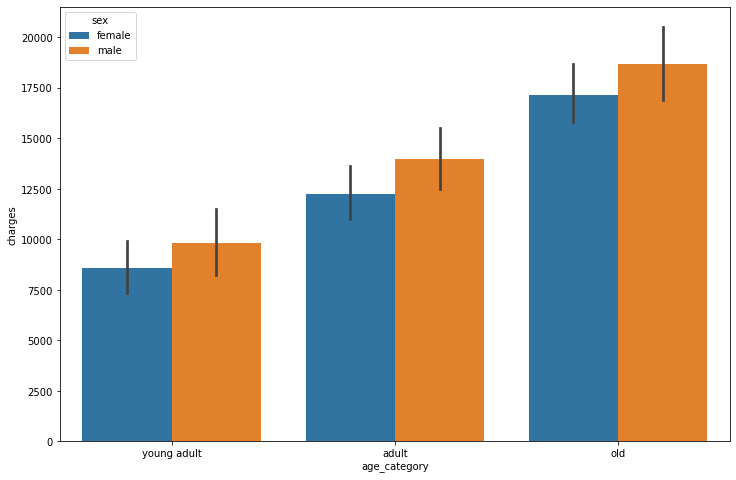

In [24]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='age_category', y='charges', hue='sex', data=df)

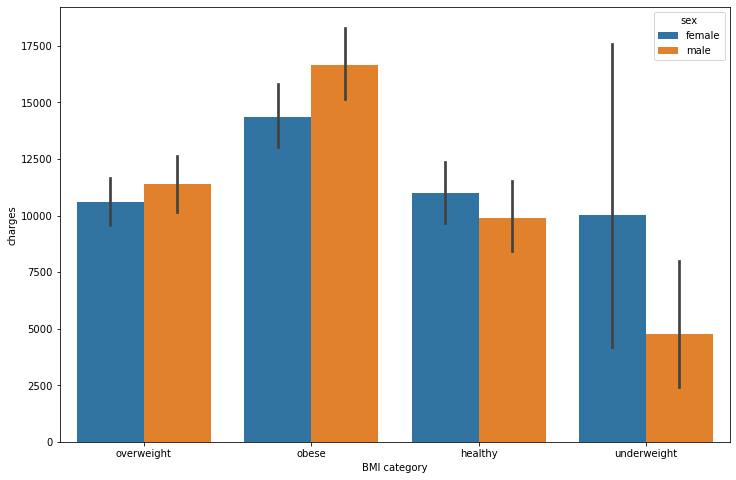

In [25]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='BMI category', y='charges', hue='sex', data=df)

In [21]:
#Correlation

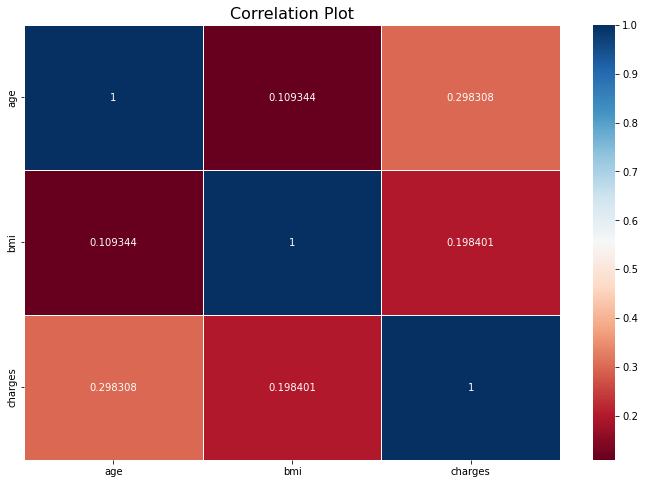

In [22]:
fig = plt.figure(figsize=(12,8))
corr = df.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")
plt.title("Correlation Plot", fontsize=16)
plt.show()

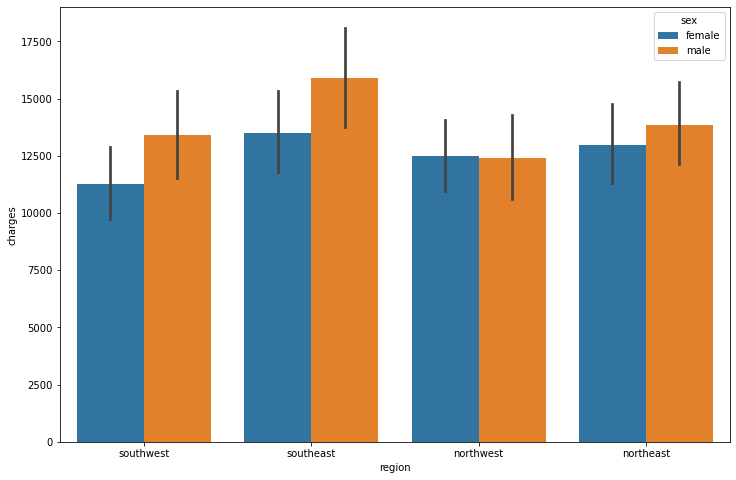

In [23]:
#Visualizing Categorical Variables¶
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df)

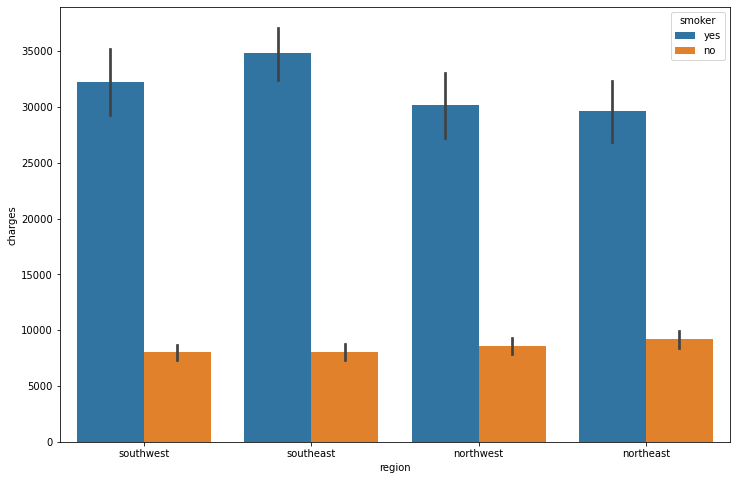

In [24]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df)

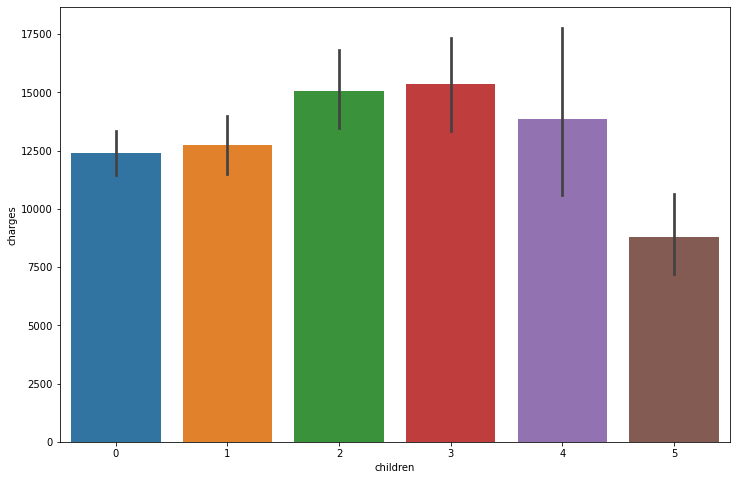

In [25]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'children', y = 'charges', data=df)

In [26]:
df = df.drop("age", axis=1)
df.head()

,sex,bmi,children,smoker,region,charges,age_category
0,female,27.90000,0,yes,southwest,16884.92400,young adult
1,male,33.77000,1,no,southeast,1725.55230,young adult
2,male,33.00000,3,no,southeast,4449.46200,young adult
3,male,22.70500,0,no,northwest,21984.47061,adult
4,male,28.88000,0,no,northwest,3866.85520,adult


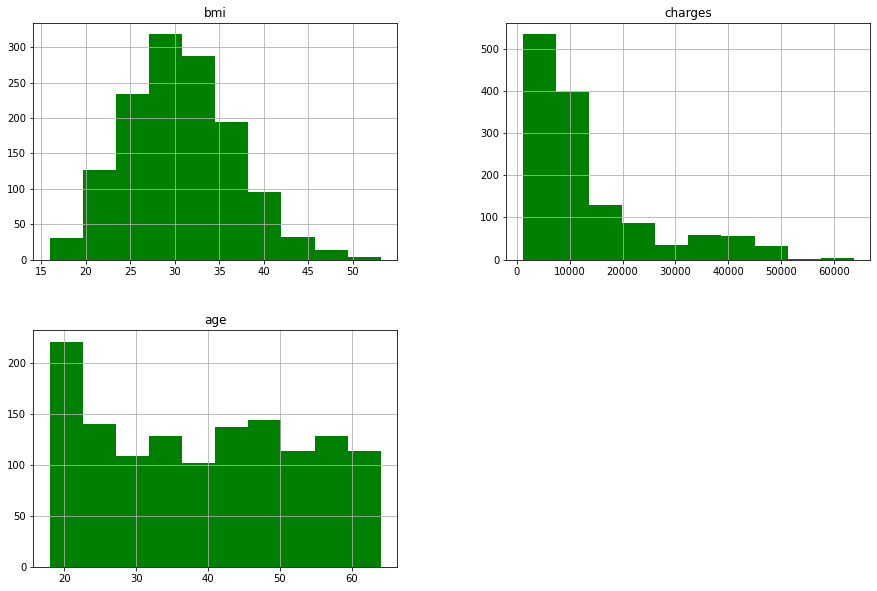

In [29]:
df[['bmi', 'charges','age']].hist(bins=10, figsize=(15,10),color='green')
plt.show()

In [28]:
#Processing Encoding and One-Hot Encoding

In [29]:
# Binary Encoding:

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    label_encoder(df, col)

df.head()

,sex,bmi,children,smoker,region,charges,age_category
0,0,27.90000,0,1,southwest,16884.92400,young adult
1,1,33.77000,1,0,southeast,1725.55230,young adult
2,1,33.00000,3,0,southeast,4449.46200,young adult
3,1,22.70500,0,0,northwest,21984.47061,adult
4,1,28.88000,0,0,northwest,3866.85520,adult


In [30]:
# One-Hot Encoding:

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, ohe_cols)
df.head()

,sex,bmi,smoker,charges,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest,age_category_old,age_category_young adult
0,0,27.90000,1,16884.92400,0,0,0,0,0,0,0,1,0,1
1,1,33.77000,0,1725.55230,1,0,0,0,0,0,1,0,0,1
2,1,33.00000,0,4449.46200,0,0,1,0,0,0,1,0,0,1
3,1,22.70500,0,21984.47061,0,0,0,0,0,1,0,0,0,0
4,1,28.88000,0,3866.85520,0,0,0,0,0,1,0,0,0,0


In [31]:
#LINEAR REGRESSION!!!!
X = df.drop(['charges'], axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
linear_model = LinearRegression().fit(X_train, y_train)
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

In [32]:
print(linear_model.intercept_)

-4302.579206634824


In [33]:
print(linear_model.coef_)

[ -711.15652751   382.00012436 23418.84157741   812.14994044
  2676.71024132  1541.91660309  4182.80299711  2151.58526627
  -215.52239476 -1007.18594776  -815.14871696  6242.73741594
 -2470.90384003]


In [34]:
# Train Set:

print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print("Model Score: ", linear_model.score(X_train, y_train))

MSE:  37530910.69478717
RMSE:  6126.247684740404
MAE:  4482.712500449716
Model Score:  0.750150082806898


In [35]:
# Test set:

print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print("Model Score: ", linear_model.score(X_test, y_test))

MSE:  38140020.04697385
RMSE:  6175.760685694828
MAE:  4324.470025795798
Model Score:  0.7215550321812634
